In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load dataset
data = pd.read_csv('tourism_data.csv')

In [3]:
data.head()

,User_ID,Age,Gender,Location_ID,Location_Name,Category,Rating,Review,Visit_Date,Duration,...,Companions,Accommodation,Price_Range,Local_Cuisine_Rating,Weather_Preference,Transport,Is_Family_Friendly,Language_Barrier,Budget,Recommend
0,930,24,Female,1797,Great Wall of China,Adventure,3,Amazing view,2023-05-24,9.3,...,1,Resort,High,5,Moderate,Car,0,1,500,0
1,394,39,Male,2000,Taj Mahal,Urban,4,Loved the architecture,2024-03-26,3.1,...,2,Guesthouse,High,5,Cool,Walking,0,1,5000,1
2,784,26,Female,1600,Machu Picchu,Nature,1,Too crowded,2024-02-11,8.1,...,0,Airbnb,Medium,3,Cool,Public Transport,0,0,2000,0
3,601,60,Male,1356,Grand Canyon,Historical,1,Too crowded,2023-08-27,2.3,...,1,Hotel,Medium,5,Warm,Walking,1,0,2000,0
4,586,69,Female,1468,Grand Canyon,Urban,4,Too crowded,2021-11-23,7.4,...,4,Hostel,Medium,2,Warm,Public Transport,0,1,1500,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_ID               5000 non-null   int64  
 1   Age                   5000 non-null   int64  
 2   Gender                5000 non-null   object 
 3   Location_ID           5000 non-null   int64  
 4   Location_Name         5000 non-null   object 
 5   Category              5000 non-null   object 
 6   Rating                5000 non-null   int64  
 7   Review                5000 non-null   object 
 8   Visit_Date            5000 non-null   object 
 9   Duration              5000 non-null   float64
 10  Activity              5000 non-null   object 
 11  Companions            5000 non-null   int64  
 12  Accommodation         5000 non-null   object 
 13  Price_Range           5000 non-null   object 
 14  Local_Cuisine_Rating  5000 non-null   int64  
 15  Weather_Preference   

In [5]:
data.describe()

,User_ID,Age,Location_ID,Rating,Duration,Companions,Local_Cuisine_Rating,Is_Family_Friendly,Language_Barrier,Budget,Recommend
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,546.931600,43.95800,1492.422800,2.963400,5.489280,2.486800,2.996000,0.505800,0.497800,2192.000000,0.50020
std,260.455662,15.38767,286.817869,1.404441,2.622468,1.707984,1.412651,0.500016,0.500045,1513.603052,0.50005
min,100.000000,18.00000,1000.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,500.000000,0.00000
25%,319.000000,31.00000,1245.000000,2.000000,3.200000,1.000000,2.000000,0.000000,0.000000,1000.000000,0.00000
50%,548.000000,44.00000,1493.000000,3.000000,5.500000,2.000000,3.000000,1.000000,0.000000,2000.000000,1.00000
75%,774.000000,57.00000,1739.250000,4.000000,7.700000,4.000000,4.000000,1.000000,1.000000,3000.000000,1.00000
max,999.000000,70.00000,2000.000000,5.000000,10.000000,5.000000,5.000000,1.000000,1.000000,5000.000000,1.00000


#### Data Cleaning

In [6]:
data.isnull().sum()

User_ID                 0
Age                     0
Gender                  0
Location_ID             0
Location_Name           0
Category                0
Rating                  0
Review                  0
Visit_Date              0
Duration                0
Activity                0
Companions              0
Accommodation           0
Price_Range             0
Local_Cuisine_Rating    0
Weather_Preference      0
Transport               0
Is_Family_Friendly      0
Language_Barrier        0
Budget                  0
Recommend               0
dtype: int64

#### Encode categorical features

In [7]:
le = LabelEncoder()

In [8]:
# Define categorical columns that need encoding
categorical_columns = ['Gender', 'Category', 'Activity', 'Accommodation','Price_Range', 'Weather_Preference', 'Transport', 
                       'Is_Family_Friendly', 'Language_Barrier']

# Initialize LabelEncoder
le = LabelEncoder()

for column in categorical_columns:
    data[column] = le.fit_transform(data[column].astype(str))

In [9]:
data['Visit_Date'] = pd.to_datetime(data['Visit_Date'])

In [10]:
# Drop or process columns with textual data
data.drop(columns=['Review'], inplace=True) 

#### Data Analysis

In [11]:
print(data.describe())

           User_ID         Age       Gender  Location_ID     Category  \
count  5000.000000  5000.00000  5000.000000  5000.000000  5000.000000   
mean    546.931600    43.95800     0.995600  1492.422800     1.511800   
min     100.000000    18.00000     0.000000  1000.000000     0.000000   
25%     319.000000    31.00000     0.000000  1245.000000     0.000000   
50%     548.000000    44.00000     1.000000  1493.000000     2.000000   
75%     774.000000    57.00000     2.000000  1739.250000     3.000000   
max     999.000000    70.00000     2.000000  2000.000000     3.000000   
std     260.455662    15.38767     0.814932   286.817869     1.125751   

            Rating                     Visit_Date     Duration     Activity  \
count  5000.000000                           5000  5000.000000  5000.000000   
mean      2.963400  2022-05-08 17:34:04.800000256     5.489280     2.004600   
min       1.000000            2020-01-01 00:00:00     1.000000     0.000000   
25%       2.000000        

In [12]:
# Selecting relevant features for segmentation
features = ['Age', 'Budget', 'Price_Range', 'Duration', 'Local_Cuisine_Rating']

In [13]:
data.dtypes

User_ID                          int64
Age                              int64
Gender                           int32
Location_ID                      int64
Location_Name                   object
Category                         int32
Rating                           int64
Visit_Date              datetime64[ns]
Duration                       float64
Activity                         int32
Companions                       int64
Accommodation                    int32
Price_Range                      int32
Local_Cuisine_Rating             int64
Weather_Preference               int32
Transport                        int32
Is_Family_Friendly               int32
Language_Barrier                 int32
Budget                           int64
Recommend                        int64
dtype: object

In [14]:
# Normalizing data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data[features])

In [15]:
# Applying KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

C:\hp\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


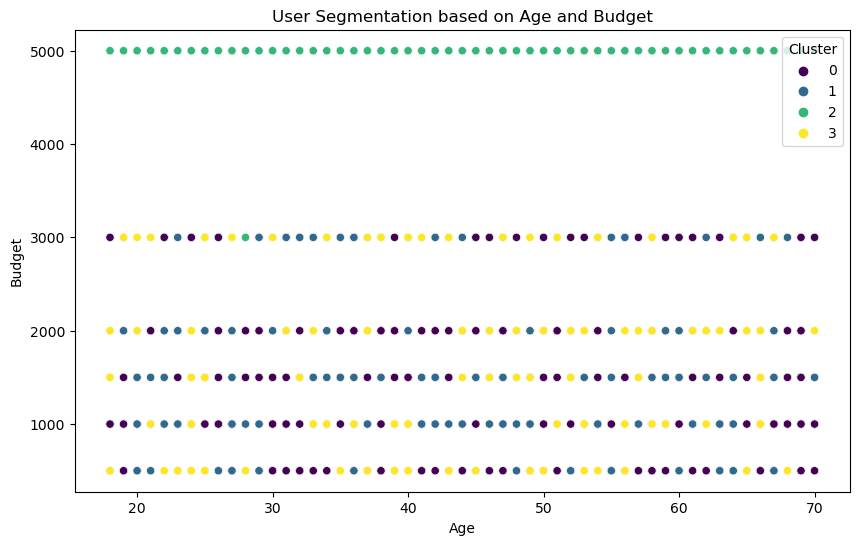

In [16]:
# Visualizing the clusters based on Age and Budget
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Budget'], hue=data['Cluster'], palette='viridis')
plt.title('User Segmentation based on Age and Budget')
plt.show()

In [17]:
# Step 4: Machine Learning Model (Logistic Regression)
# Predicting if a user will recommend a location
X = data[['Age', 'Gender', 'Category', 'Rating', 'Duration', 'Price_Range', 'Local_Cuisine_Rating', 'Budget']]
y = data['Recommend']

#### Split the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
# Making predictions and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [21]:
print(f"Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Model Accuracy: 48.30%
Confusion Matrix:
 [[176 343]
 [174 307]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.34      0.41       519
           1       0.47      0.64      0.54       481

    accuracy                           0.48      1000
   macro avg       0.49      0.49      0.47      1000
weighted avg       0.49      0.48      0.47      1000



In [22]:
# Display a few predictions vs actuals
sample_data = X_test.sample(5, random_state=42)
sample_pred = model.predict(sample_data)
sample_actual = y_test.loc[sample_data.index]

#### Sample Prediction

In [23]:
print("\nSample Predictions vs Actual Values:")
for idx in sample_data.index:
    print(f"User {idx}: Predicted = {sample_pred[sample_data.index.get_loc(idx)]}, Actual = {sample_actual[idx]}")


Sample Predictions vs Actual Values:
User 3707: Predicted = 1, Actual = 0
User 828: Predicted = 1, Actual = 1
User 2664: Predicted = 0, Actual = 1
User 1047: Predicted = 1, Actual = 1
User 3197: Predicted = 0, Actual = 0


#### Financial Equation

In [24]:
unit_price = 500  # Example unit price for the product
fixed_cost = 2000  # Monthly cost of running the business

In [25]:
# Assuming sales_number can be inferred from the dataset using some metric like 'Recommend' counts or any other available metric
# You can tweak this part as per the actual dataset structure
sales_number = data['Recommend'].sum()  # Assuming 'Recommend' counts as a proxy for sales

In [26]:
# Calculating total revenue
total_revenue = (unit_price * sales_number) - fixed_cost
print(f"Total Revenue: Rs. {total_revenue}")

Total Revenue: Rs. 1248500


In [27]:
# Adding revenue column to the dataset
data['Revenue'] = (unit_price * data['Recommend']) - fixed_cost

#### Visualize the Data

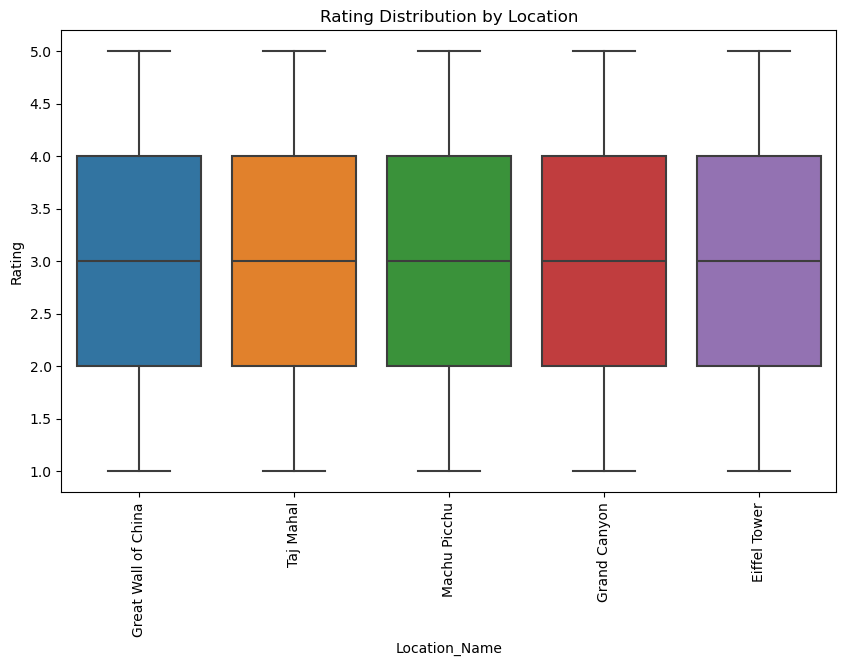

In [28]:
# Rating distribution by Location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location_Name', y='Rating', data=data)
plt.title('Rating Distribution by Location')
plt.xticks(rotation=90)
plt.show()

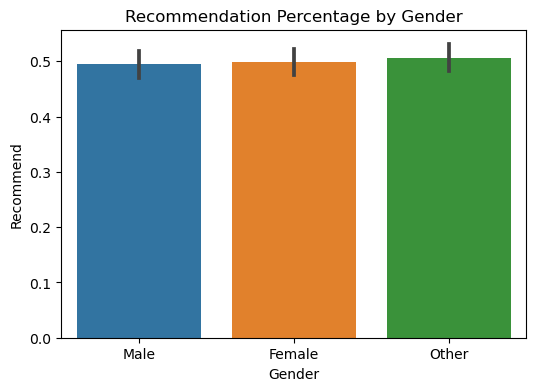

In [29]:
# Recommendation percentage by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Recommend', data=data, estimator=lambda x: sum(x)/len(x))
plt.title('Recommendation Percentage by Gender')
plt.xticks([0, 1, 2], ['Male', 'Female', 'Other'])
plt.show()